House in USA DataScience Project

Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import requests
import seaborn as sns

# Dataset Overview

**Dataset upload**

In [2]:
df = pd.read_csv("../raw_data/kc_house_data 2.csv", parse_dates=['date'])

**Dataset Overview**

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

**Preprocessing Dataset**

In [5]:
df.duplicated().sum()

0

In [6]:
missing_col = df.isnull().sum().sort_values(ascending=False)
missing_col

id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

## Analysis of number of bedrooms:

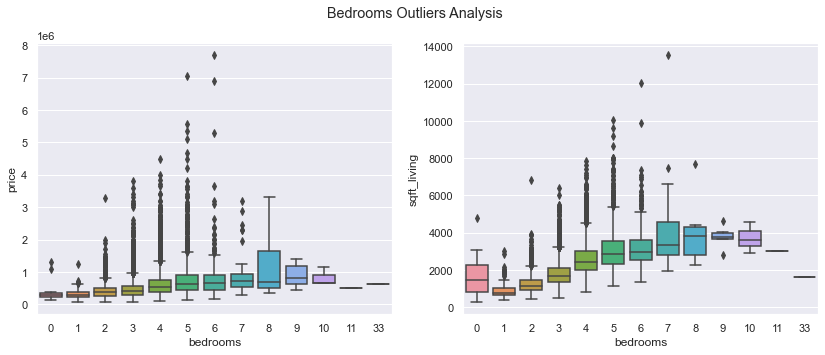

In [7]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize= (14,5))
fig.suptitle('Bedrooms Outliers Analysis')

#create boxplot in each subplot
sns.boxplot(data=df, x="bedrooms", y="price", ax=axes[0])
sns.boxplot(data=df, x="bedrooms", y="sqft_living", ax=axes[1]);

*Quantity of houses with ZERO bedroom and outliers*

In [8]:
no_bed_0 = (df[df['bedrooms']<1].value_counts().sum())
no_bed_11 = (df[df['bedrooms']==11].value_counts().sum())
no_bed_33 = (df[df['bedrooms']==33].value_counts().sum())

perc_no_bed = round((no_bed_0 + no_bed_11 + no_bed_33)*100/len(df),2)
print(f"Excluding the data with ZERO bedrooms and outliers, which represents {perc_no_bed}%")

Excluding the data with ZERO bedrooms and outliers, which represents 0.07%


Graphs shows bedrooms outliers for Zero bedrooms, 11 bedrooms and 33 bedrooms with low prices but high living areas, we will drop the columns, total of 13 lines

### Excluding bedrooms outliers, bedrooms = 0, 11, 33

In [9]:
df = df[(df['bedrooms']>=1) & (df['bedrooms']<11)]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Checking Bathrooms

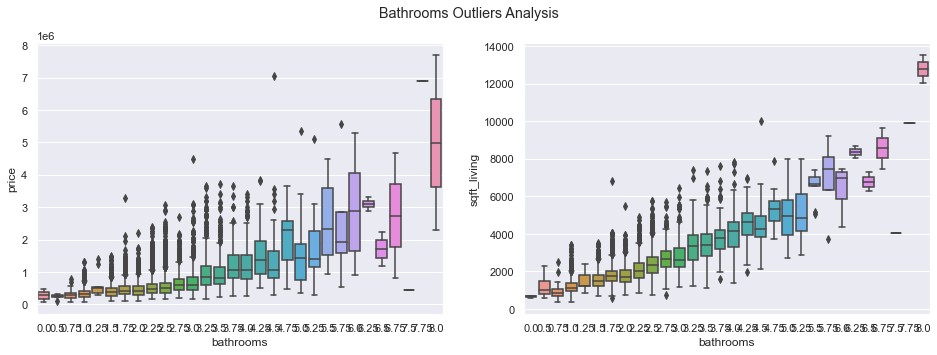

In [10]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize= (16,5))
fig.suptitle('Bathrooms Outliers Analysis')

#create boxplot in each subplot
sns.boxplot(data=df, x="bathrooms", y="price", ax=axes[0])
sns.boxplot(data=df, x="bathrooms", y="sqft_living", ax=axes[1]);

It was not possible to identify any outliers for the bathrooms after cleaning the bedrooms outliers

# Data pre-analysis

**Correlation Matrix**

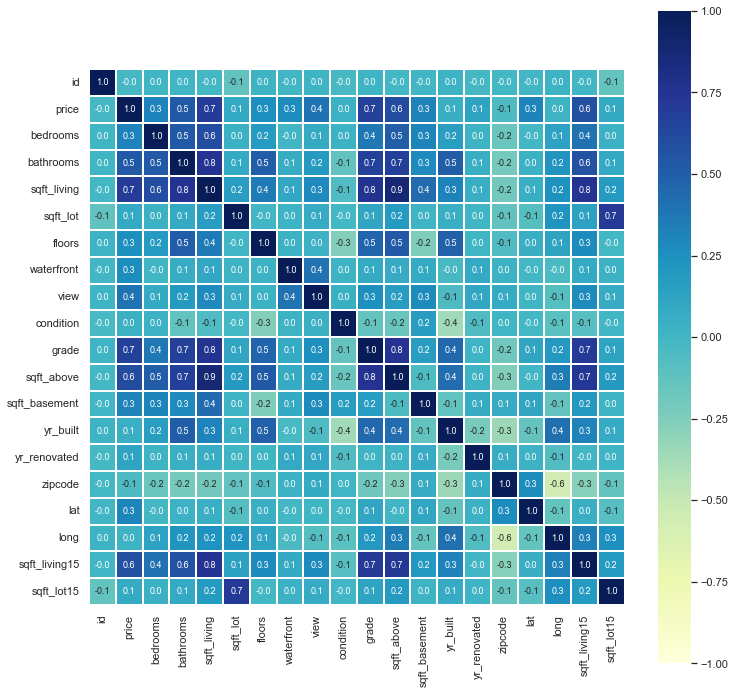

In [11]:
# corr = df.corr() -- Pearson Correlation

fig, ax = plt.subplots(figsize = (12, 12))
# Heatmap
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True, fmt = ".1f", annot_kws = {"fontsize": 9},
            vmin = -1, vmax = 1, square = True, linewidths = 0.01, linecolor = "white", cbar = True)

sns.despine(top = True, right = True, left = True, bottom = True)

**Features correlated with price**

In [12]:
# Focusing on house prices
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701941
grade            0.667781
sqft_above       0.605431
sqft_living15    0.585322
bathrooms        0.525903
view             0.397331
sqft_basement    0.323816
bedrooms         0.316602
lat              0.306850
waterfront       0.266434
floors           0.256901
yr_renovated     0.126510
sqft_lot         0.089830
sqft_lot15       0.082755
yr_built         0.054029
condition        0.036093
long             0.021840
id              -0.016707
zipcode         -0.053353
Name: price, dtype: float64

In [13]:
# Looking at the highest correlation features with price:
df_corr = df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms']]

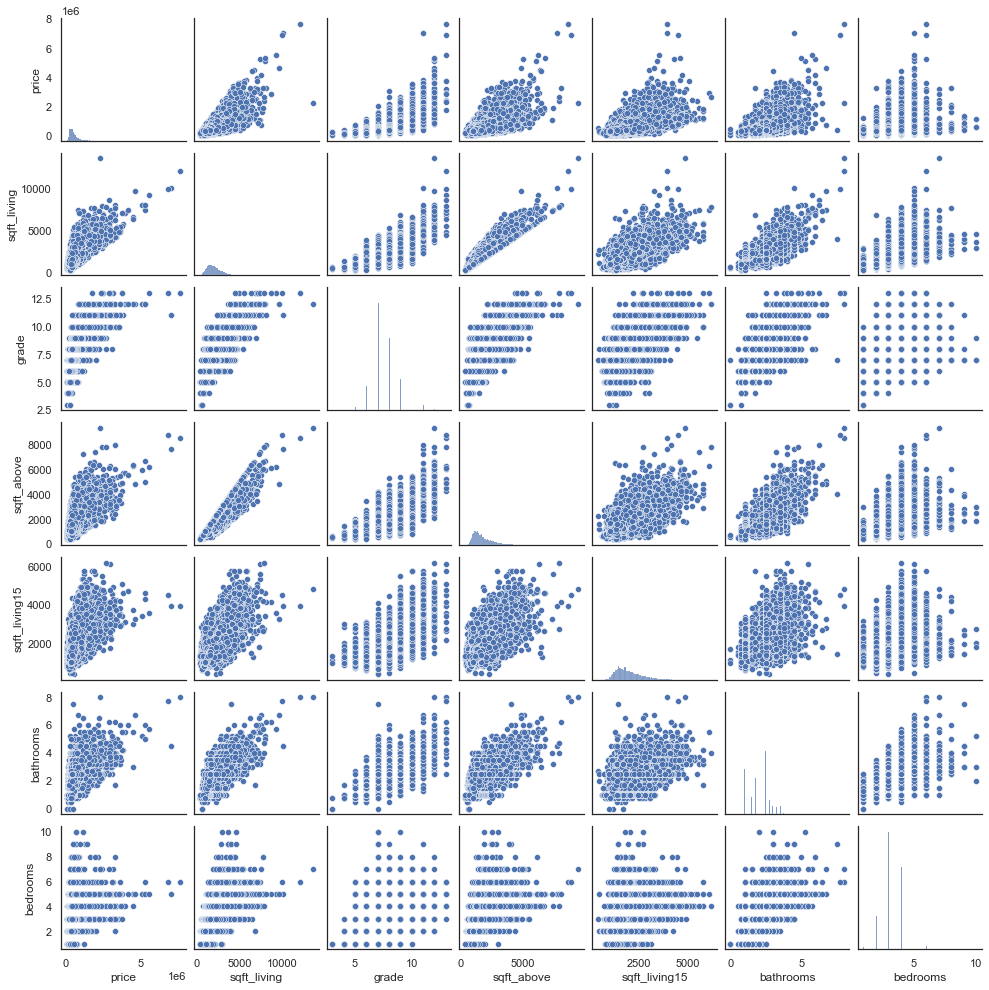

In [14]:
sns.set(style='white')
sns.pairplot(df_corr, height=2)
plt.show()

In [15]:
df_summary = df[['price', 'bedrooms', 'bathrooms', 'sqft_living']].sort_values(by = 'price', ascending=False)
df_summary.head(20)

,price,bedrooms,bathrooms,sqft_living
7252,7700000.0,6,8.00,12050
3914,7062500.0,5,4.50,10040
9254,6885000.0,6,7.75,9890
4411,5570000.0,5,5.75,9200
1448,5350000.0,5,5.00,8000
1315,5300000.0,6,6.00,7390
1164,5110800.0,5,5.25,8010
8092,4668000.0,5,6.75,9640
2626,4500000.0,5,5.50,6640
8638,4489000.0,4,3.00,6430


# Descriptive Analysis

## CEO Queries:

👇  Why the CEO has raised questions about the business plan?

If you were the CEO, why would you ask this? Is your objective to increase income? How is the business performance?

Sales in 2015 has decreased 48% compared to 2014, therefore the business is not performing well compared to previous year

 sales in 2015 has been 47.97% lower than 2014


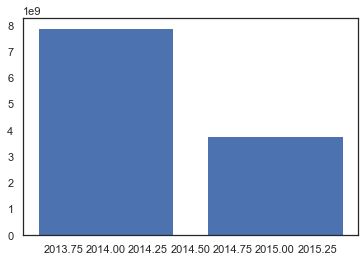

In [16]:
df['df_year'] = df['date'].dt.year
resul = df.groupby('df_year')['price'].sum().reset_index()
resul
plt.bar(resul.df_year, resul.price)
vendas_2014 = resul.price[0]
vendas_2015 = round((resul.price[1]/vendas_2014)*100,2)
#print(vendas_2014)
print(f" sales in 2015 has been {vendas_2015}% lower than 2014")

## Hyphotheses regarding business behaviour

**Bedrooms**

1 - Houses with more bedrooms are more expensive? Why? \
2 - How many rooms does the price increase? \
3 - What is the price increment for each room added?

Casas com muitos quartos são mais caras? Porque? A partir de quantos quartos o preço aumenta? Qual o incremento de preço por cada quarto adicionado?

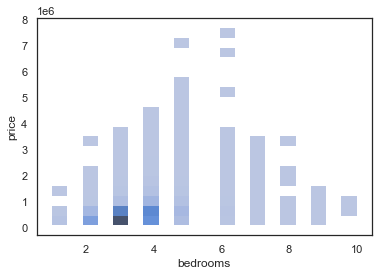

In [17]:
sns.histplot(data = df, x = 'bedrooms', y = 'price', bins = 20, kde = False);

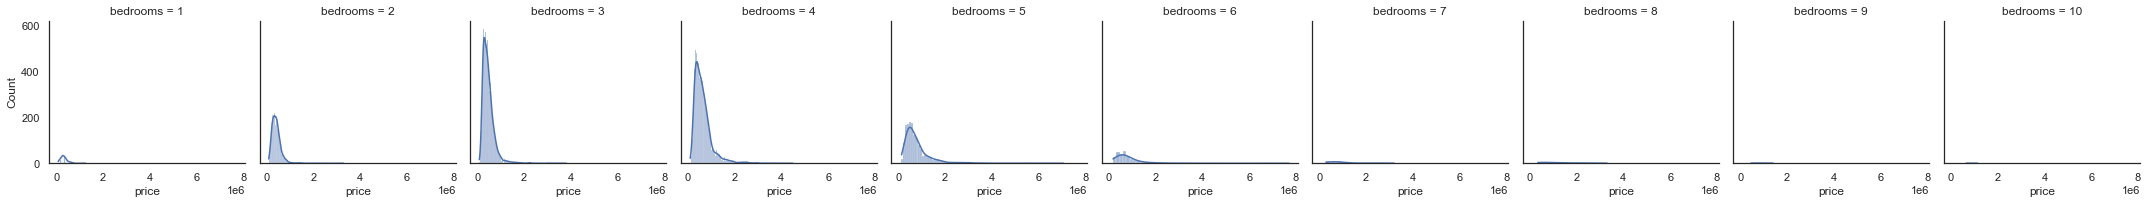

In [18]:
# Your code here
g = sns.FacetGrid(df, col="bedrooms") #row="smoker", hue='smoker'
g.map(sns.histplot, "price", kde=True)

In [19]:
df_bed = df[['price', 'bedrooms']]

In [20]:
from sklearn.preprocessing import OneHotEncoder

df_bed.bedrooms.unique() # Check unique categories in bedrooms

bedrooms_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder

bedrooms_ohe.fit(df_bed[['bedrooms']]) # Fit one hot encoder

bedrooms_ohe.categories_ # View categories of bedrooms

df_bed['bed1'],df_bed['bed2'],df_bed['bed3'],df_bed['bed4'], df_bed['bed5'], df_bed['bed6'], df_bed['bed7'], df_bed['bed8'], df_bed['bed9'], df_bed['bed10']  = bedrooms_ohe.fit_transform(df_bed[['bedrooms']]).T # Put encoded columns back in dataframe

df_bed.drop(columns=['bedrooms'], inplace = True) # Drop original column

df_bed.head()

/var/folders/s2/rxgrts2d0x3cngcs6yc5fmr40000gn/T/ipykernel_79318/2378801322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed['bed1'],df_bed['bed2'],df_bed['bed3'],df_bed['bed4'], df_bed['bed5'], df_bed['bed6'], df_bed['bed7'], df_bed['bed8'], df_bed['bed9'], df_bed['bed10']  = bedrooms_ohe.fit_transform(df_bed[['bedrooms']]).T # Put encoded columns back in dataframe
/Users/vanessalieberg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,bed1,bed2,bed3,bed4,bed5,bed6,bed7,bed8,bed9,bed10
0,221900.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear Regression model: Price vs Bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

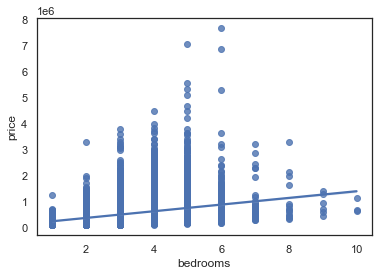

In [21]:
sns.regplot(data = df, x = 'bedrooms', y = 'price')

In [22]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model1 = smf.ols(formula = 'price ~ bedrooms', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2406.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        06:59:54   Log-Likelihood:            -3.0625e+05
No. Observations:               21598   AIC:                         6.125e+05
Df Residuals:                   21596   BIC:                         6.125e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.062e+05   9158.878     11.598      0.000    8.83e+04    1.24e+05
bedrooms    1.287e+05   2624.329     49.050      0.000    1.24e+05    1.34e+05
==============================================================================
Omnibus:                    18933.232   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1173587.229
Skew:                           3.945   Prob(JB):                         0.00
Kurtosis:                      38.240   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model1.params

Intercept    106221.090137
bedrooms     128722.405620
dtype: float64

### Checking prices up to 5 bedrooms

In [36]:
df_5bed = df[df['bedrooms'] <=5]

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

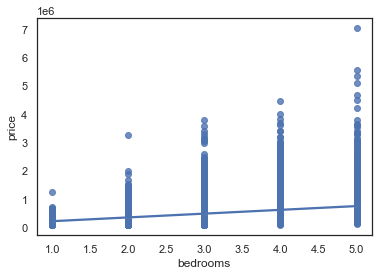

In [46]:
sns.regplot(x='bedrooms', y='price', data=df_5bed)

In [38]:
model_5bed = smf.ols(formula = 'price ~ bedrooms', data=df_5bed).fit()
model_5bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2298.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:05:38   Log-Likelihood:            -3.0083e+05
No. Observations:               21266   AIC:                         6.017e+05
Df Residuals:                   21264   BIC:                         6.017e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    9.07e+04   9558.040      9.489      0.000     7.2e+04    1.09e+05
bedrooms    1.337e+05   2788.833     47.936      0.000    1.28e+05    1.39e+05
==============================================================================
Omnibus:                    16884.097   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           655661.084
Skew:                           3.526   Prob(JB):                         0.00
Kurtosis:                      29.272   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model_5bed.params

Intercept     90695.467433
bedrooms     133686.400919
dtype: float64

### Checking prices above 5 bedrooms

In [41]:
df_many_bed = df[df['bedrooms'] >5]

In [42]:
model_many_bed = smf.ols(formula = 'price ~ bedrooms', data=df_many_bed).fit()
model_many_bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.118
Date:                Tue, 12 Apr 2022   Prob (F-statistic):              0.291
Time:                        07:07:33   Log-Likelihood:                -4977.5
No. Observations:                 332   AIC:                             9959.
Df Residuals:                     330   BIC:                             9967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.452e+05   3.87e+05      1.150      0.251   -3.16e+05    1.21e+06
bedrooms    6.476e+04   6.12e+04      1.058      0.291   -5.57e+04    1.85e+05
==============================================================================
Omnibus:                      353.380   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14010.079
Skew:                           4.630   Prob(JB):                         0.00
Kurtosis:                      33.447   Cond. No.                         58.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model_many_bed.params

Intercept    445150.147884
bedrooms      64757.804364
dtype: float64

# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [24]:
X = df.drop(columns=['price','id','date'])
y = df['price']

👇 Cross validate a linear regression model. The score under variable name saved as `base_model_score`.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

0.6975092408007748

👇 Feature Permutation to identify the importance of each feature in the model

In [26]:
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=300) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

,feature,feature importance
8,grade,0.189932
2,sqft_living,0.156891
14,lat,0.10374
11,yr_built,0.088623
9,sqft_above,0.051823
5,waterfront,0.037621
6,view,0.023794
0,bedrooms,0.018634
1,bathrooms,0.015698
13,zipcode,0.014487


Removing floors form the model, as it shows the lowest importance

In [27]:
X_floors = df.drop(columns=['price','id','date', 'floors'])
y = df['price']

In [28]:
model_floors = LinearRegression()

scores_floors = cross_val_score(model_floors, X_floors, y, cv=10)

base_model_score_floors = scores_floors.mean()

base_model_score_floors

0.6974959893552946

# Multivariate Linear Regression (with statsmodel)

Selecting the features for our model

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'df_year'],
      dtype='object')

In [30]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [31]:
formula = "price ~ " + ' + '.join(features)

⚖️ **Standardize the features.**

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others


📅 , we will discover Machine Learning Algorithms. We will also need to perform some scaling operations before trying to predict any target.

In [32]:
orders_standardized = df.copy()
for f in features:
    mu = df[f].mean()
    sigma = df[f].std()
    orders_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
orders_standardized

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,df_year
0,7129300520,2014-10-13,221900.0,-0.411008,-1.449949,-0.980277,-0.228253,-0.915407,-0.087201,-0.305701,...,-0.734995,-0.658871,-0.544757,-0.210080,1.869738,-0.352738,-0.306000,-0.943568,-0.260725,2014
1,6414100192,2014-12-09,538000.0,-0.411008,0.174814,0.533534,-0.189810,0.937542,-0.087201,-0.305701,...,0.460913,0.244754,-0.680938,4.747569,0.879330,1.161388,-0.746414,-0.432805,-0.187800,2014
2,5631500400,2015-02-25,180000.0,-1.518412,-1.449949,-1.426797,-0.123211,-0.915407,-0.087201,-0.305701,...,-1.230270,-0.658871,-1.293753,-0.210080,-0.933303,1.283355,-0.135517,1.070299,-0.172291,2015
3,2487200875,2014-12-09,604000.0,0.696396,1.149671,-0.130800,-0.243948,-0.915407,-0.087201,-0.305701,...,-0.892033,1.396876,-0.204305,-0.210080,1.084887,-0.283455,-1.272070,-0.914381,-0.284557,2014
4,1954400510,2015-02-18,510000.0,-0.411008,-0.150139,-0.435741,-0.169574,-0.915407,-0.087201,-0.305701,...,-0.131001,-0.658871,0.544691,-0.210080,-0.073703,0.409376,1.199933,-0.272279,-0.192786,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,-0.411008,0.499766,-0.599101,-0.337375,2.790491,-0.087201,-0.305701,...,-0.312199,-0.658871,1.293687,-0.210080,0.468218,1.004779,-0.938207,-0.666296,-0.412551,2014
21609,6600060120,2015-02-23,400000.0,0.696396,0.499766,0.250375,-0.224317,0.937542,-0.087201,-0.305701,...,0.630032,-0.658871,1.463913,-0.210080,1.271756,-0.356347,-1.051863,-0.228499,-0.203896,2015
21610,1523300141,2014-06-23,402101.0,-1.518412,-1.774902,-1.154529,-0.332087,0.937542,-0.087201,-0.305701,...,-0.928273,-0.658871,1.293687,-0.210080,1.234382,0.247716,-0.604345,-1.410552,-0.394293,2014
21611,291310100,2015-01-16,400000.0,-0.411008,0.499766,-0.522866,-0.307022,0.937542,-0.087201,-0.305701,...,-0.227640,-0.658871,1.123460,-0.210080,-0.951990,-0.184582,1.029450,-0.841415,-0.420691,2015


In [33]:
import statsmodels.formula.api as smf
model_OS = smf.ols(formula = formula, data = orders_standardized).fit()
print(model_OS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2968.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:00:04   Log-Likelihood:            -2.9437e+05
No. Observations:               21598   AIC:                         5.888e+05
Df Residuals:                   21580   BIC:                         5.889e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.401e+05   1625.320    332.331